# "Learning" the XOR gate

## Multiple layers:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Input-output for an XOR gate:

In [2]:
input = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
output = np.array([[0], [1], [1], [0]])  

### Visualize the gate:

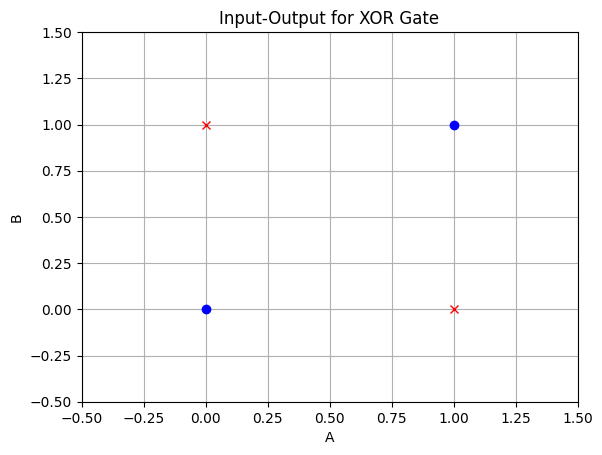

In [3]:
for i in range(len(input)):
    if output[i][0] == 1:
        plt.plot(input[i][0], input[i][1], 'rx')
    else:
        plt.plot(input[i][0], input[i][1], 'bo')

plt.title('Input-Output for XOR Gate')
plt.xlabel('A')
plt.ylabel('B')
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.grid()
plt.show()

### Add noise to data:

In [4]:
Np = 100
x1 = []
x2 = []
y = []

for i in range(4):
    if output[i][0] == 1:
        x1.append(np.random.normal(loc=input[i][0], scale=0.1, size=Np))
        x2.append(np.random.normal(loc=input[i][1], scale=0.1, size=Np))
        y.append(np.ones(Np))
    else:
        x1.append(np.random.normal(loc=input[i][0], scale=0.1, size=Np))
        x2.append(np.random.normal(loc=input[i][1], scale=0.1, size=Np))
        y.append(-np.ones(Np))

x1 = np.concatenate(x1)
x2 = np.concatenate(x2)
y = np.concatenate(y)

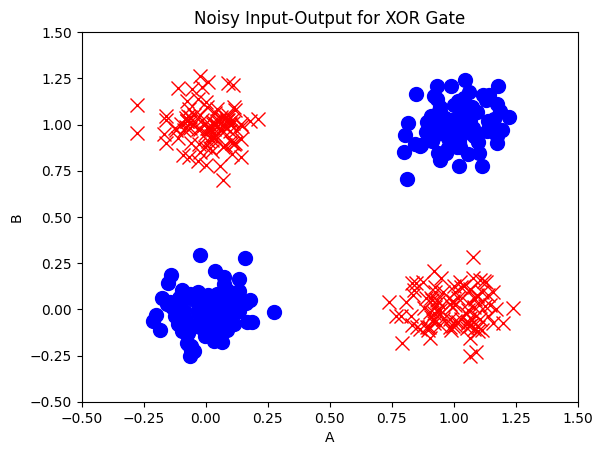

In [5]:
for i in range(len(y)):
    if y[i] == 1:
        plt.plot(x1[i], x2[i], 'rx', markersize=10)
    else:
        plt.plot(x1[i], x2[i], 'bo', markersize=10)

plt.title('Noisy Input-Output for XOR Gate')
plt.xlabel('A')
plt.ylabel('B')
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.show()

## Multi-layer neural network:

<div style="border: 2px solid #535353; width: 520px; padding: 10px; background-color: #f2f2f2; border-radius: 8px;">
<div style="background-color: white; padding: 10px; border-radius: 5px; max-width: 500px; overflow: auto;">

![multi-layer NN](Fig/NN2.png)

$$
y_1 = \tanh(\color{red}{w_{11}} x_1 + \color{red}{w_{12}} x_2 + \color{red}{b_1})
$$
$$
y_2 = \tanh(\color{red}{w_{21}} x_1 + \color{red}{w_{22}} x_2 + \color{red}{b_2})
$$
$$
z = \tanh(\color{blue}{W_{11}} y_1 + \color{blue}{W_{12}} y_2 + \color{blue}{B_1})
$$

</div>
</div>

<div style="border: 2px solid #535353; width: 620px; padding: 10px; background-color: #f2f2f2; border-radius: 8px;">
<div style="background-color: white; padding: 10px; border-radius: 5px; max-width: 600px; overflow: auto;">

$$
\mathbf{y} = \left( \begin{matrix} y_1 \\\\ y2 \end{matrix} \right)
= \tanh\left[ \left( \begin{matrix} w_{11} & w_{12} \\\\ w_{21} & w_{22} \end{matrix} \right) \left( \begin{matrix} x_1 \\\\ x_2 \end{matrix} \right) + \left( \begin{matrix} b_1 \\\\ b_2 \end{matrix} \right) \right] 
$$
$$
\mathbf{y} = \tanh\left[ \mathbf{w} \mathbf{x} + \mathbf{b} \right]
$$
$$
\mathbf{z} = \tanh\left[ \mathbf{W} \mathbf{y} + \mathbf{B} \right]
$$

</div>
</div>

## Universal function approximator

<div style="border: 2px solid #535353; width: 520px; padding: 10px; background-color: #f2f2f2; border-radius: 8px;">
<div style="background-color: white; padding: 10px; border-radius: 5px; max-width: 500px; overflow: auto;">

$$
\mathbf{z} = \left( \mathbf{W}_2 \; \tanh(\mathbf{W}_1 \; \mathbf{x} + \mathbf{B}_1 ) + \mathbf{B}_2 \right)
$$
<br>

![NN3](Fig/NN3.png)

</div>
</div>

In [6]:
x = [x1 , x2]
x = np.array(x)
y = np.array([y])

### Random initialization of weights:

In [7]:
NumberNodes = 2

W1 = 0.5 - np.random.rand( NumberNodes , 2 )
W2 = 0.5 - np.random.rand( 1 , NumberNodes )

B1 = 0.5 - np.random.rand( NumberNodes , 1 )
B2 = 0.5 - np.random.rand( 1 , 1 )

### Initial classification:

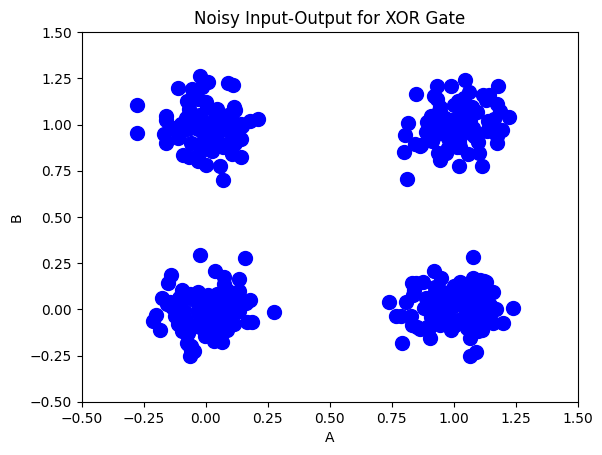

In [8]:
zz = np.tanh( W1 @ x + B1 )
z = W2 @ zz + B2

for i in range(len(z[0,:])):
    if z[0,i] > 0.5:
        plt.plot(x1[i], x2[i], 'rx', markersize=10)
    else:
        plt.plot(x1[i], x2[i], 'bo', markersize=10)

plt.title('Noisy Input-Output for XOR Gate')
plt.xlabel('A')
plt.ylabel('B')
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.show()

## Training:

In [9]:
NumberEpochs = 10000
eta = 0.01

In [15]:
xx = np.zeros( [2,1] )
yy = np.zeros( [1,1] )

NumberData = np.size(y)

for Epoch in range( NumberEpochs ):

    for Data in range( NumberData ):
        RandomIndex = np.int64( np.floor( np.random.rand(1) * NumberData ) )

        xx[0,0] = x[0,RandomIndex[0]]
        xx[1,0] = x[1,RandomIndex[0]]
        yy[:,0] = y[:,RandomIndex[0]]

        zz = np.tanh( W1 @ xx + B1 )
        z = W2 @ zz + B2

        dB2 = 2 * ( z - yy )
        dB1 = 2 * (1/np.cosh( W1 @ xx + B1 ))**2 * ( W2.T @ (z-yy) )

        dW2 = dB2 @ zz.T
        dW1 = dB1 @ xx.T

        W1 = W1 - eta * dW1
        W2 = W2 - eta * dW2
        B1 = B1 - eta * dB1
        B2 = B2 - eta * dB2

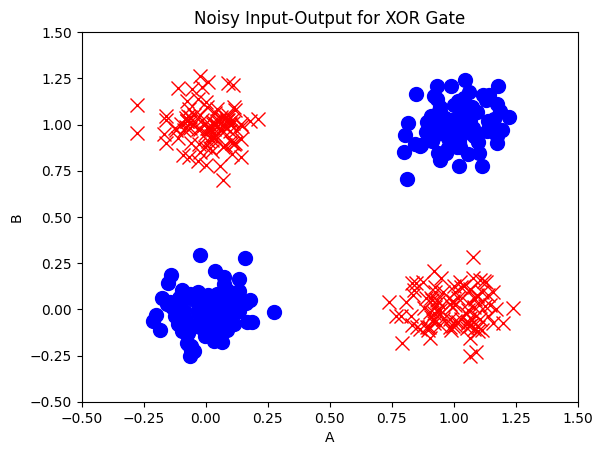

In [14]:
zz = np.tanh( W1 @ x + B1 )
z = W2 @ zz + B2

for i in range(len(z[0,:])):
    if z[0,i] > 0.5:
        plt.plot(x1[i], x2[i], 'rx', markersize=10)
    else:
        plt.plot(x1[i], x2[i], 'bo', markersize=10)

plt.title('Noisy Input-Output for XOR Gate')
plt.xlabel('A')
plt.ylabel('B')
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.show()

### Initial prediction:

$\mathbf{y} = \tanh\left( \mathbf{w} \mathbf{x} + \mathbf{b} \right)$

$\mathbf{z} = \tanh\left[ \mathbf{W} \mathbf{y} + \mathbf{B} \right] = \tanh\left[ \mathbf{W} \tanh\left( \mathbf{w} \mathbf{x} + \mathbf{b} \right) + \mathbf{B} \right]
$

In [13]:
Y = np.tanh( w @ X + b)
Z_pred = np.tanh(W @ Y + B)

NameError: name 'w' is not defined

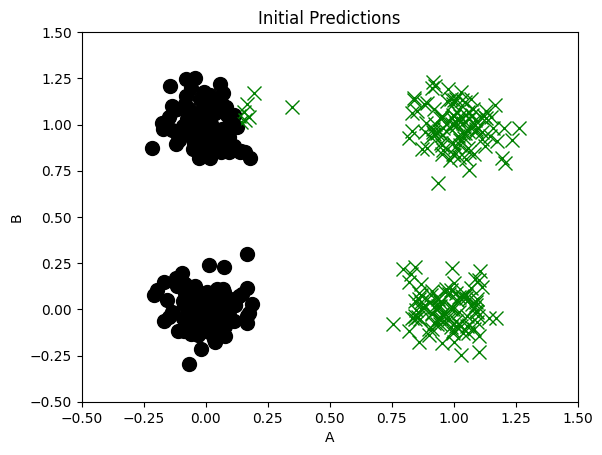

In [ ]:
for i in range(4*Np):
    if Z_pred[0,i] >= 0:
        plt.plot(X[0,i], X[1,i], 'gx', markersize=10)
    else:
        plt.plot(X[0,i], X[1,i], 'ko', markersize=10)

plt.title('Initial Predictions')
plt.xlabel('A')
plt.ylabel('B')
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.show()

### Loss function:

$ E(\mathbf{W},\mathbf{w},\mathbf{b},\mathbf{B}) = \frac{1}{N_p} \sum_{i=1}^{N_p} [z_i - \tanh\left[ \mathbf{W} \tanh\left( \mathbf{w} \mathbf{x} + \mathbf{b} \right) + \mathbf{B} \right]]^2 $

### Gradients:

$$
\frac{\partial E}{\partial w1} = -\frac{2}{N_p} \sum_{i=1}^{N_p} [y_i-\tanh(x1 \: w1 + x2 \: w2 + b)] \; \text{sech}^2(x1 \: w1 + x2 \: w2 + b) \; x1
$$
$$
\frac{\partial E}{\partial w2} = -\frac{2}{N_p} \sum_{i=1}^{N_p} [y_i-\tanh(x1 \: w1 + x2 \: w2 + b)] \; \text{sech}^2(x1 \: w1 + x2 \: w2 + b) \; x2
$$
$$
\frac{\partial E}{\partial b} = -\frac{2}{N_p} \sum_{i=1}^{N_p} [y_i-\tanh(x1 \: w1 + x2 \: w2 + b)] \; \text{sech}^2(x1 \: w1 + x2 \: w2 + b)
$$

$$
\frac{\partial E}{\partial w1} = -\frac{2}{N_p} \sum_{i=1}^{N_p} [y_i-\tanh(x1 \: w1 + x2 \: w2 + b)] \; \text{sech}^2(x1 \: w1 + x2 \: w2 + b) \; x1
$$
$$
\frac{\partial E}{\partial w2} = -\frac{2}{N_p} \sum_{i=1}^{N_p} [y_i-\tanh(x1 \: w1 + x2 \: w2 + b)] \; \text{sech}^2(x1 \: w1 + x2 \: w2 + b) \; x2
$$
$$
\frac{\partial E}{\partial b} = -\frac{2}{N_p} \sum_{i=1}^{N_p} [y_i-\tanh(x1 \: w1 + x2 \: w2 + b)] \; \text{sech}^2(x1 \: w1 + x2 \: w2 + b)
$$

$$
\frac{\partial E}{\partial W_{ij}} = -\frac{2}{N_p} \sum_{k=1}^{N_p} \; [z_k-\tanh( \mathbf{W} \mathbf{y} + \mathbf{B})] \; \text{sech}^2( \mathbf{W} \mathbf{y} + \mathbf{B}) \; y_j 
$$
$$
\frac{\partial E}{\partial B_i} = -\frac{2}{N_p} \sum_{k=1}^{N_p} \; [z_k-\tanh( \mathbf{W} \mathbf{y} + \mathbf{B})] \; \text{sech}^2( \mathbf{W} \mathbf{y} + \mathbf{B}) 
$$
$$
\frac{\partial E}{\partial w2} = -\frac{2}{N_p} \sum_{i=1}^{N_p} [y_i-\tanh(x1 \: w1 + x2 \: w2 + b)] \; \text{sech}^2(x1 \: w1 + x2 \: w2 + b) \; x2
$$
$$
\frac{\partial E}{\partial b} = -\frac{2}{N_p} \sum_{i=1}^{N_p} [y_i-\tanh(x1 \: w1 + x2 \: w2 + b)] \; \text{sech}^2(x1 \: w1 + x2 \: w2 + b)
$$

### Gradient descent:

$$
w1 \rightarrow w1 - \eta \frac{\partial E}{\partial w1}
$$
$$
w2 \rightarrow w2 - \eta \frac{\partial E}{\partial w2}
$$
$$
b \rightarrow b - \eta \frac{\partial E}{\partial b}
$$

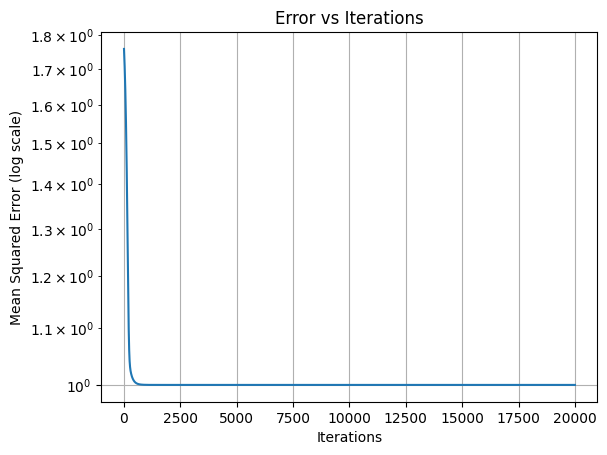

In [ ]:
eta = 0.01  # Learning rate
n_iter = 20000

EE = np.zeros(n_iter)

for it in range(n_iter):
    yy = np.tanh((x1 * w1) + (x2 * w2) + b)
    error = y - yy

    dE_dw1 = (-2 / (Np * 4)) * np.sum(error * (1 - yy**2) * x1)
    dE_dw2 = (-2 / (Np * 4)) * np.sum(error * (1 - yy**2) * x2)
    dE_db = (-2 / (Np * 4)) * np.sum(error * (1 - yy**2))

    w1 -= eta * dE_dw1
    w2 -= eta * dE_dw2
    b -= eta * dE_db

    EE[it] = np.mean(error**2)

plt.plot(range(n_iter), EE)
plt.yscale('log')
plt.title('Error vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error (log scale)')
plt.grid()
plt.show()

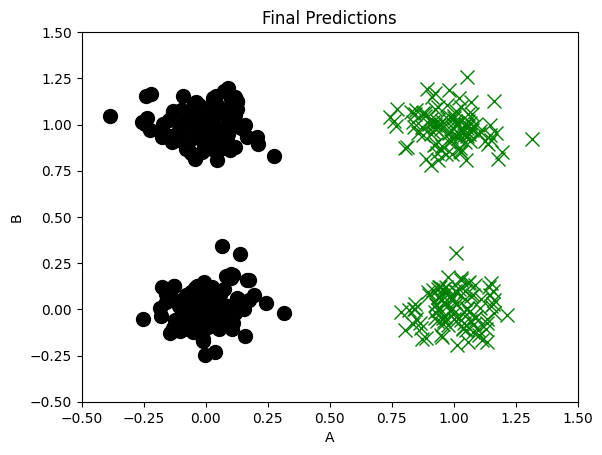

In [ ]:
yy = np.tanh((x1 * w1) + (x2 * w2) + b)

for i in range(len(yy)):
    if yy[i] >= 0:
        plt.plot(x1[i], x2[i], 'gx', markersize=10)
    else:
        plt.plot(x1[i], x2[i], 'ko', markersize=10)

plt.title('Final Predictions')
plt.xlabel('A')
plt.ylabel('B')
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.show()

### The classifying "Line": 
$$
x2 = -\left(\frac{w1}{w2}\right) x1 - \frac{b}{w2}
$$

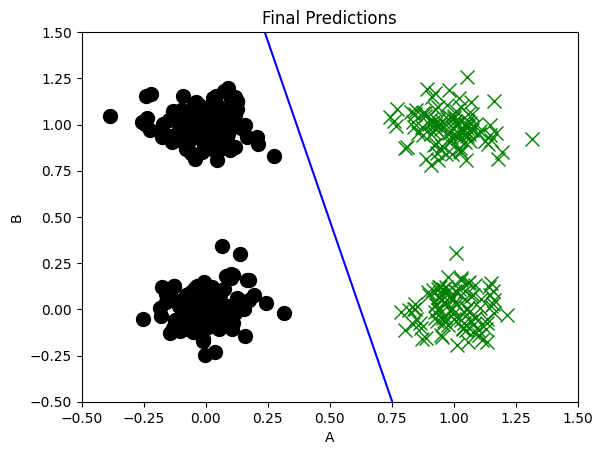

In [ ]:
yy = np.tanh((x1 * w1) + (x2 * w2) + b)

for i in range(len(yy)):
    if yy[i] >= 0:
        plt.plot(x1[i], x2[i], 'gx', markersize=10)
    else:
        plt.plot(x1[i], x2[i], 'ko', markersize=10)

xx1 = np.linspace(-0.5, 1.5, 100)
xx2 = - (w1/w2) * xx1 - (b/w2)

plt.plot(xx1, xx2, 'b-')
plt.title('Final Predictions')
plt.xlabel('A')
plt.ylabel('B')
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.show()